In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidneystone/kidney-stone-dataset.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [3]:
df=pd.read_csv('/kaggle/input/kidneystone/kidney-stone-dataset.csv')
df.head(10)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0
5,5,1.020,5.27,668,25.3,252,3.34,0
6,6,1.012,5.62,461,17.4,195,1.40,0
7,7,1.029,5.67,1107,35.9,550,8.48,0
8,8,1.015,5.41,543,21.9,170,1.16,0
9,9,1.021,6.13,779,25.7,382,2.21,0


<Axes: xlabel='target', ylabel='count'>

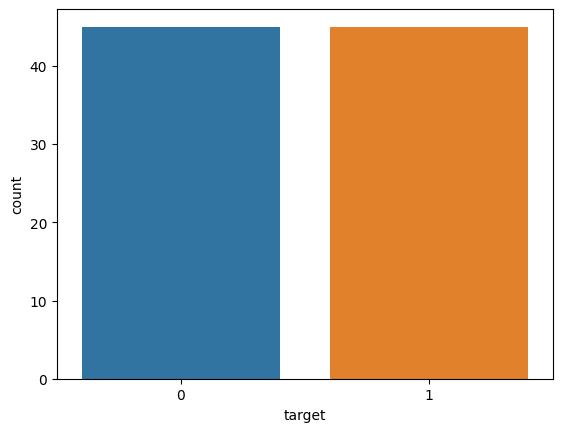

In [4]:
sns.countplot(df,x='target')

In [5]:
len(df.index)

90

<Axes: ylabel='Frequency'>

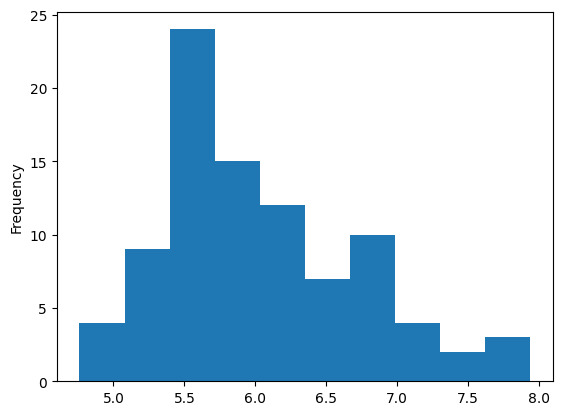

In [6]:
df['ph'].plot.hist()

# Data wrangling


In [7]:
df.isnull().sum()

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head(3)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0


In [10]:
X=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=lg.predict(X_test)
accuracy_score(y_test,y_pred)

0.6666666666666666

# KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
y_p=kn.predict(X_test)
accuracy_score(y_test,y_p)

0.4444444444444444

# RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pr=rf.predict(X_test)
acc=accuracy_score(y_test,y_pr)

In [14]:
acc

0.7407407407407407

# User input

In [15]:
import pandas as pd
# grav=str(input('input for gravity : ' ))
# p=str(input('input for ph : '))
# os=str(input('input for osmolarity : '))
# co=str(input('input for conductivity : '))
# ur=str(input('input for urea concentration : '))
# cl=str(input('input for calcium concentration : '))

gravity=['1.030']#grav
ph=['5.5']#p
osmo=['1099']#os
cond=['19.9']#co
urea=['201']#ur
calc=['8.89']#cl

dict = {'gravity': gravity,
'ph':  ph,
'osmo':  osmo,
'cond': cond,
'urea': urea,
'calc':calc }

dif = pd.DataFrame(dict)

# saving the dataframe
dif.to_csv('test.csv')

In [16]:
tf=pd.read_csv('/kaggle/working/test.csv')
tf

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc
0,0,1.03,5.5,1099,19.9,201,8.89


In [17]:
tf.drop('Unnamed: 0' ,axis=1,inplace=True)
tf

,gravity,ph,osmo,cond,urea,calc
0,1.03,5.5,1099,19.9,201,8.89


# Positive-kidney_stone present
# Negative-kidney_stone absent

In [18]:
y_pri=rf.predict(tf)
acc=round(acc,2)
if y_pri[0]==0:
  print(f'negative probable({acc})')
else:
   print(f'positive probable({acc})')

positive probable(0.74)
